In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_train = 'data/mnist_train.csv'
df_train = pd.read_csv(path_train)
X_train, y_train = df_train.loc[:, '1x1':'28x28'].to_numpy(), df_train.loc[:,'label'].to_numpy()
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [3]:
path_test = 'data/mnist_test.csv'
df_test = pd.read_csv(path_test)
X_test, y_test = df_test.loc[:, '1x1':'28x28'].to_numpy(), df_test.loc[:,'label'].to_numpy()
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [4]:
def render_images(images_array, labels):
    n = images_array.shape[0]
    for i in range(n):
        plt.subplot(1, n, i + 1)
        image = 255 - images_array[i].reshape(28, 28).astype(np.uint8)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(labels[i])

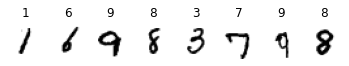

In [5]:
samples = 8
index = np.random.choice(X_test.shape[0], samples, replace=False)
render_images(X_test[index], y_test[index])

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
test_count = 10
y_pred = knn.predict(X_test[:test_count])
print('Прогнозы для тестового набора \n {}'.format(y_pred))
print('Метки тестового набора \n {}'.format(y_test[:test_count]))

Прогнозы для тестового набора 
 [7 2 1 0 4 1 4 9 5 9]
Метки тестового набора 
 [7 2 1 0 4 1 4 9 5 9]


In [8]:
print('Точность {}'.format(knn.score(X_test, y_test)))

Точность 0.9705


In [9]:
X_train_norm, X_test_norm = X_train / 255, X_test / 255
knn_norm = KNeighborsClassifier(n_neighbors=3)
knn_norm.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
test_count = 10
y_pred = knn_norm.predict(X_test_norm[:test_count])
print('Прогнозы для тестового набора \n {}'.format(y_pred))
print('Метки тестового набора \n {}'.format(y_test[:test_count]))

Прогнозы для тестового набора 
 [7 2 1 0 4 1 4 9 5 9]
Метки тестового набора 
 [7 2 1 0 4 1 4 9 5 9]


In [11]:
print('Точность {}'.format(knn_norm.score(X_test_norm, y_test)))

Точность 0.9705


In [3]:
import tensorflow as tf
image_path = 'data/image.png'
image = tf.keras.preprocessing.image.load_img(image_path, color_mode='grayscale')
image_array = tf.keras.preprocessing.image.img_to_array(image).reshape(28 * 28)
image_array = 1 - np.array([image_array]) / 255

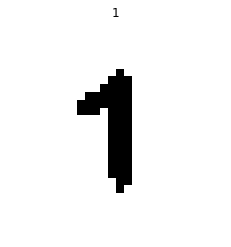

In [19]:
prediction = knn.predict(image_array)
render_images(image_array, prediction)